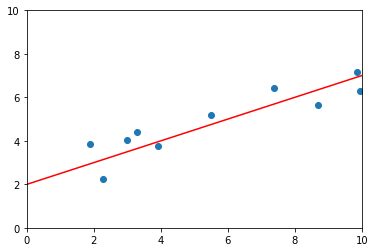

In [14]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

'''
beta_0과 beta_1 을 변경하면서 그래프에 표시되는 선을 확인한다.
beta_0 : 기울기 / beta_1 : 절편
'''

beta_0 = 0.5 # beta_0에 저장된 기울기 값을 조정 
beta_1 = 2 # beta_1에 저장된 절편 값을 조정 

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정  
plt.ylim(0, 10) # 그래프의 Y축을 설정 

# 이미지를 표시
plt.savefig("test.png")

### loss function
* ∑ 
i
N
​
 (y 
(i)
 −(β 
0
​
 x 
(i)
 +β 
1
​
 )) 
2

Loss: 46.341726


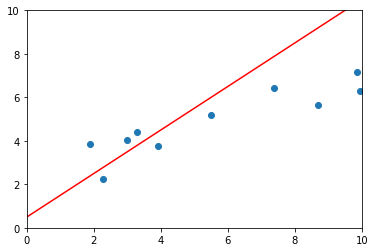

In [13]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴 
    '''
    total_loss = 0
    for i in range(N):
        x_i = x[i] # 실제 인덱스 i번 째 x 값
        y_i = y[i] # 실제 인덱스 i번 째 y 값
        
        y_predicted = beta_0 * x_i + beta_1
        diff = (y_i - y_predicted) ** 2
        total_loss += diff
    
    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정 
plt.ylim(0, 10) # 그래프의 Y축을 설정 
plt.savefig("test.png")  
plt.show(loss)


### Scikit-learn을 이용한 회귀분석

beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


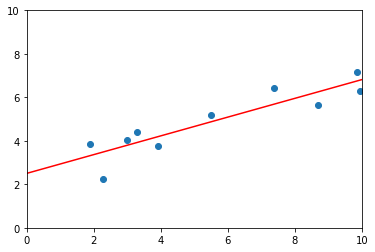

In [16]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline

def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    x = np.array(x)
    y = np.array(y)
    total_loss = np.sum((y-(beta_0 * x + beta_1)) ** 2)
    
    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]


# 행 1 열 10

# print(X)
train_X = np.array(X).reshape(-1, 1)
train_Y = np.array(Y).reshape(-1, 1)

# print(train_X)
'''
모델 트레이닝 
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''

# coefficient 의 0번 째 값 (단순 회귀분석) 
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정 
plt.ylim(0, 10) # 그래프의 Y축을 설정 
plt.savefig("test.png")  
plt.show(loss)

### 다중 회귀 분석

* Sales=β 
0
​
 X 
1
​
 +β 
1
​
 X 
2
​
 +β 
2
​
 X 
3
​
 +β 
3
​
*  X1 
​
  은 페이스북, X2​
  는 TV, X3
​
  은 신문 광고를 의미

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
'''
X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 한다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 한다.
Y는 Sales column 에 해당하는 데이터를 저장해야 한다.
'''

import csv
csvreader = csv.reader(open("Advertising.csv"))

x = []
y = []

# 헤더 건너뛰기
next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

# print(X)
# print(X.shape)
# print(Y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

# coef (기울기)
beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력한다.
    '''
    sales = beta_0 * fb + beta_1 * tv + beta_2 * newspaper + beta_3

    return sales

print("예상 판매량: %f" % expected_sales(10, 12, 3, beta_0, beta_1, beta_2, beta_3))

beta_0: 0.045765
beta_1: 0.188530
beta_2: -0.001037
beta_3: 2.938889
예상 판매량: 5.655784


### 다항식 회귀 분석

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

 
import csv
csvreader = csv.reader(open("Advertising.csv"))

x = []
y = []

# 헤더 건너뛰기
next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)



# 다항식 회귀분석을 진행하기 위해 변수들을 조합 
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] ** 2, # X_1^2
        x_i[1], # X_2
        x_i[1] * x_i[2], # X_2 * X_3
        x_i[2] # X_3
    ])

# X, Y를 80:20  /  80%는 Train data, 20%는 Test data
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.01, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석을 진행 
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구한다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구한다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

MSE on train data: 5.147763444610845
MSE on test data: 0.7560868986401728


### 영어 단어 코퍼스 분석

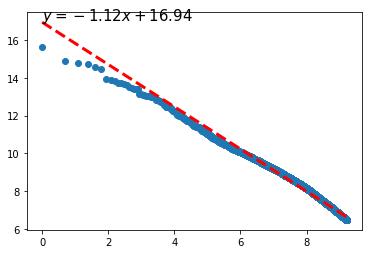

In [22]:
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


def main():
    words = read_data()
    # print(words)
    words = sorted(words, key = lambda x : x[1] , reverse = True) # words.txt 단어를 빈도수 순으로 정렬
    
    # 정수로 표현된 단어를 X축 리스트에, 각 단어의 빈도수를 Y축 리스트에 저장 
    X = list(range(1, len(words)+1))
    Y = [x[1] for x in words]
    
    # X, Y 리스트를 array로 변환합니다. 
    X, Y = np.array(X).reshape(-1,1), np.array(Y)
    
    # X, Y의 각 원소 값에 log()를 적용합니다.
    X, Y = np.log(X), np.log(Y)
    
    # 기울기와 절편을 구한 후 그래프와 차트를 출력합니다. 
    slope, intercept = do_linear_regression(X, Y)
    draw_chart(X, Y, slope, intercept)
    
    return slope, intercept


# read_data() - words.txt에 저장된 단어와 해당 단어의 빈도수를 리스트형으로 변환
def read_data():
    # words.txt 에서 단어들를 읽어, 
    # [[단어1, 빈도수], [단어2, 빈도수] ... ]형으로 변환해 리턴
    words = []

    filename = 'words.txt'

    x = []
    y = []

    with open(filename) as data:
        lines = data.readlines()
        
    for line in lines:
        word = line.replace('\n','').split(',')
        word[1] = int(word[1])
        words.append(word)
    return words

# do_linear_regression() - 임포트한 sklearn 패키지의 함수를 이용해 그래프의 기울기와 절편을 구한다.
def do_linear_regression(X, Y):
    
    lrmodel = LinearRegression()
    lrmodel.fit(X,Y)
    
    # slope
    slope = lrmodel.coef_[0] 
    intercept = lrmodel.intercept_
    #beta_1 = lrmodel.coef_[1]
    return (slope, intercept)


# draw_chart() - matplotlib을 이용해 차트를 설정
def draw_chart(X, Y, slope, intercept):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X, Y)

    # 차트의 X, Y축 범위와 그래프를 설정
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = max_X * slope + intercept
    plt.plot([min_X, max_X], [min_Y, max_Y], 
             color='red',
             linestyle='--',
             linewidth=3.0)
    
    # 기울과와 절편을 이용해 그래프를 차트에 입력
    ax.text(min_X, min_Y + 0.1, r'$y = %.2lfx + %.2lf$' % (slope, intercept), fontsize=15)
    
    plt.savefig('chart.png')

if __name__ == "__main__":
    main()